# ML lab cheatsheet

**NOTE:** This file only contains very common stuff or code which is not easy remember; don't take this as a complete reference (not yet at least).

## Import csv file

**Manual check for decimal separator, delimiter etc.:**

In [1]:
data_file = "winequality-red.csv"

with open(data_file) as file_:
    print(file_.readline(), '\n', file_.readline())

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
 
 7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5



**Import as a dataframe:**

In [2]:
import pandas as pd
df = pd.read_csv(data_file, sep=';', decimal='.')

print(f'Shape of the input data {df.shape}\n')
df.head()

Shape of the input data (1599, 12)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Another example:
data_file = 'ex1_4dim_data.csv'
df2 = pd.read_csv(data_file, delimiter=',', names=['col1', 'col2', 'col3', 'col4']) # or use: header=None

**Import as numpy array:**

In [4]:
import numpy as np
array_ = np.loadtxt(data_file, delimiter = ',', skiprows=1)
array_

array([[-7.34042862, -8.72857588,  0.71133595,  0.47990538],
       [-5.87989894, -9.67872194,  0.83034584,  0.95005037],
       [ 5.99573058,  0.99734687,  0.69092592,  0.27973426],
       ...,
       [ 8.66665333,  2.24624035,  0.56094515,  0.54870162],
       [-6.42901135, -7.61916345,  0.62596863,  0.72250904],
       [ 8.40905145,  5.05965674,  0.94054364,  0.21942322]])

## Ignore warnings

In [39]:
import warnings

warnings.simplefilter("ignore")
# here warning are ignored
warnings.resetwarnings()

In [7]:
# The same implemented as a handy decorator:
def no_warn(decd):
    import warnings
    def f(*args, **kargs):
        warnings.simplefilter("ignore")
        val = decd(*args, **kargs)
        warnings.resetwarnings()
        return val 
    return f

## Graphically analyze a dataframe

**Understand relations between attributes:**

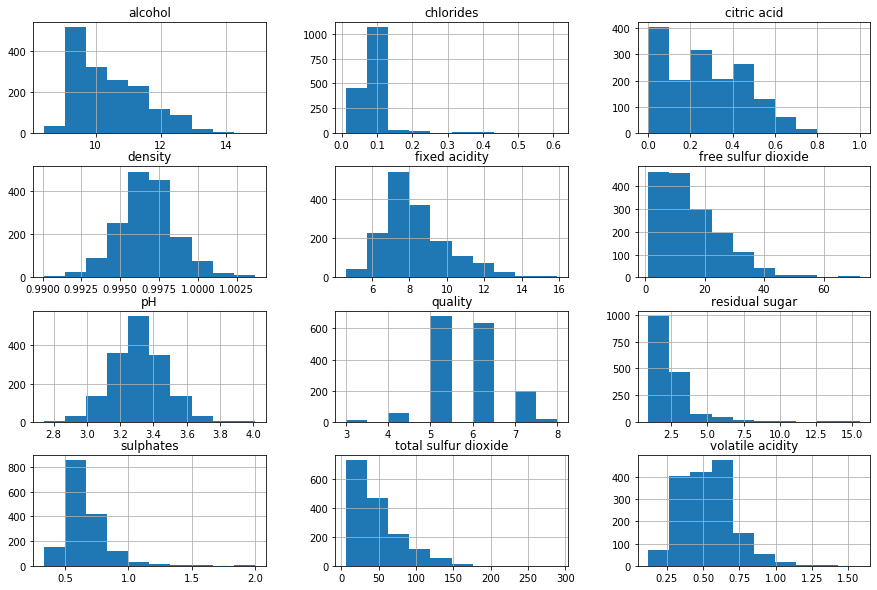

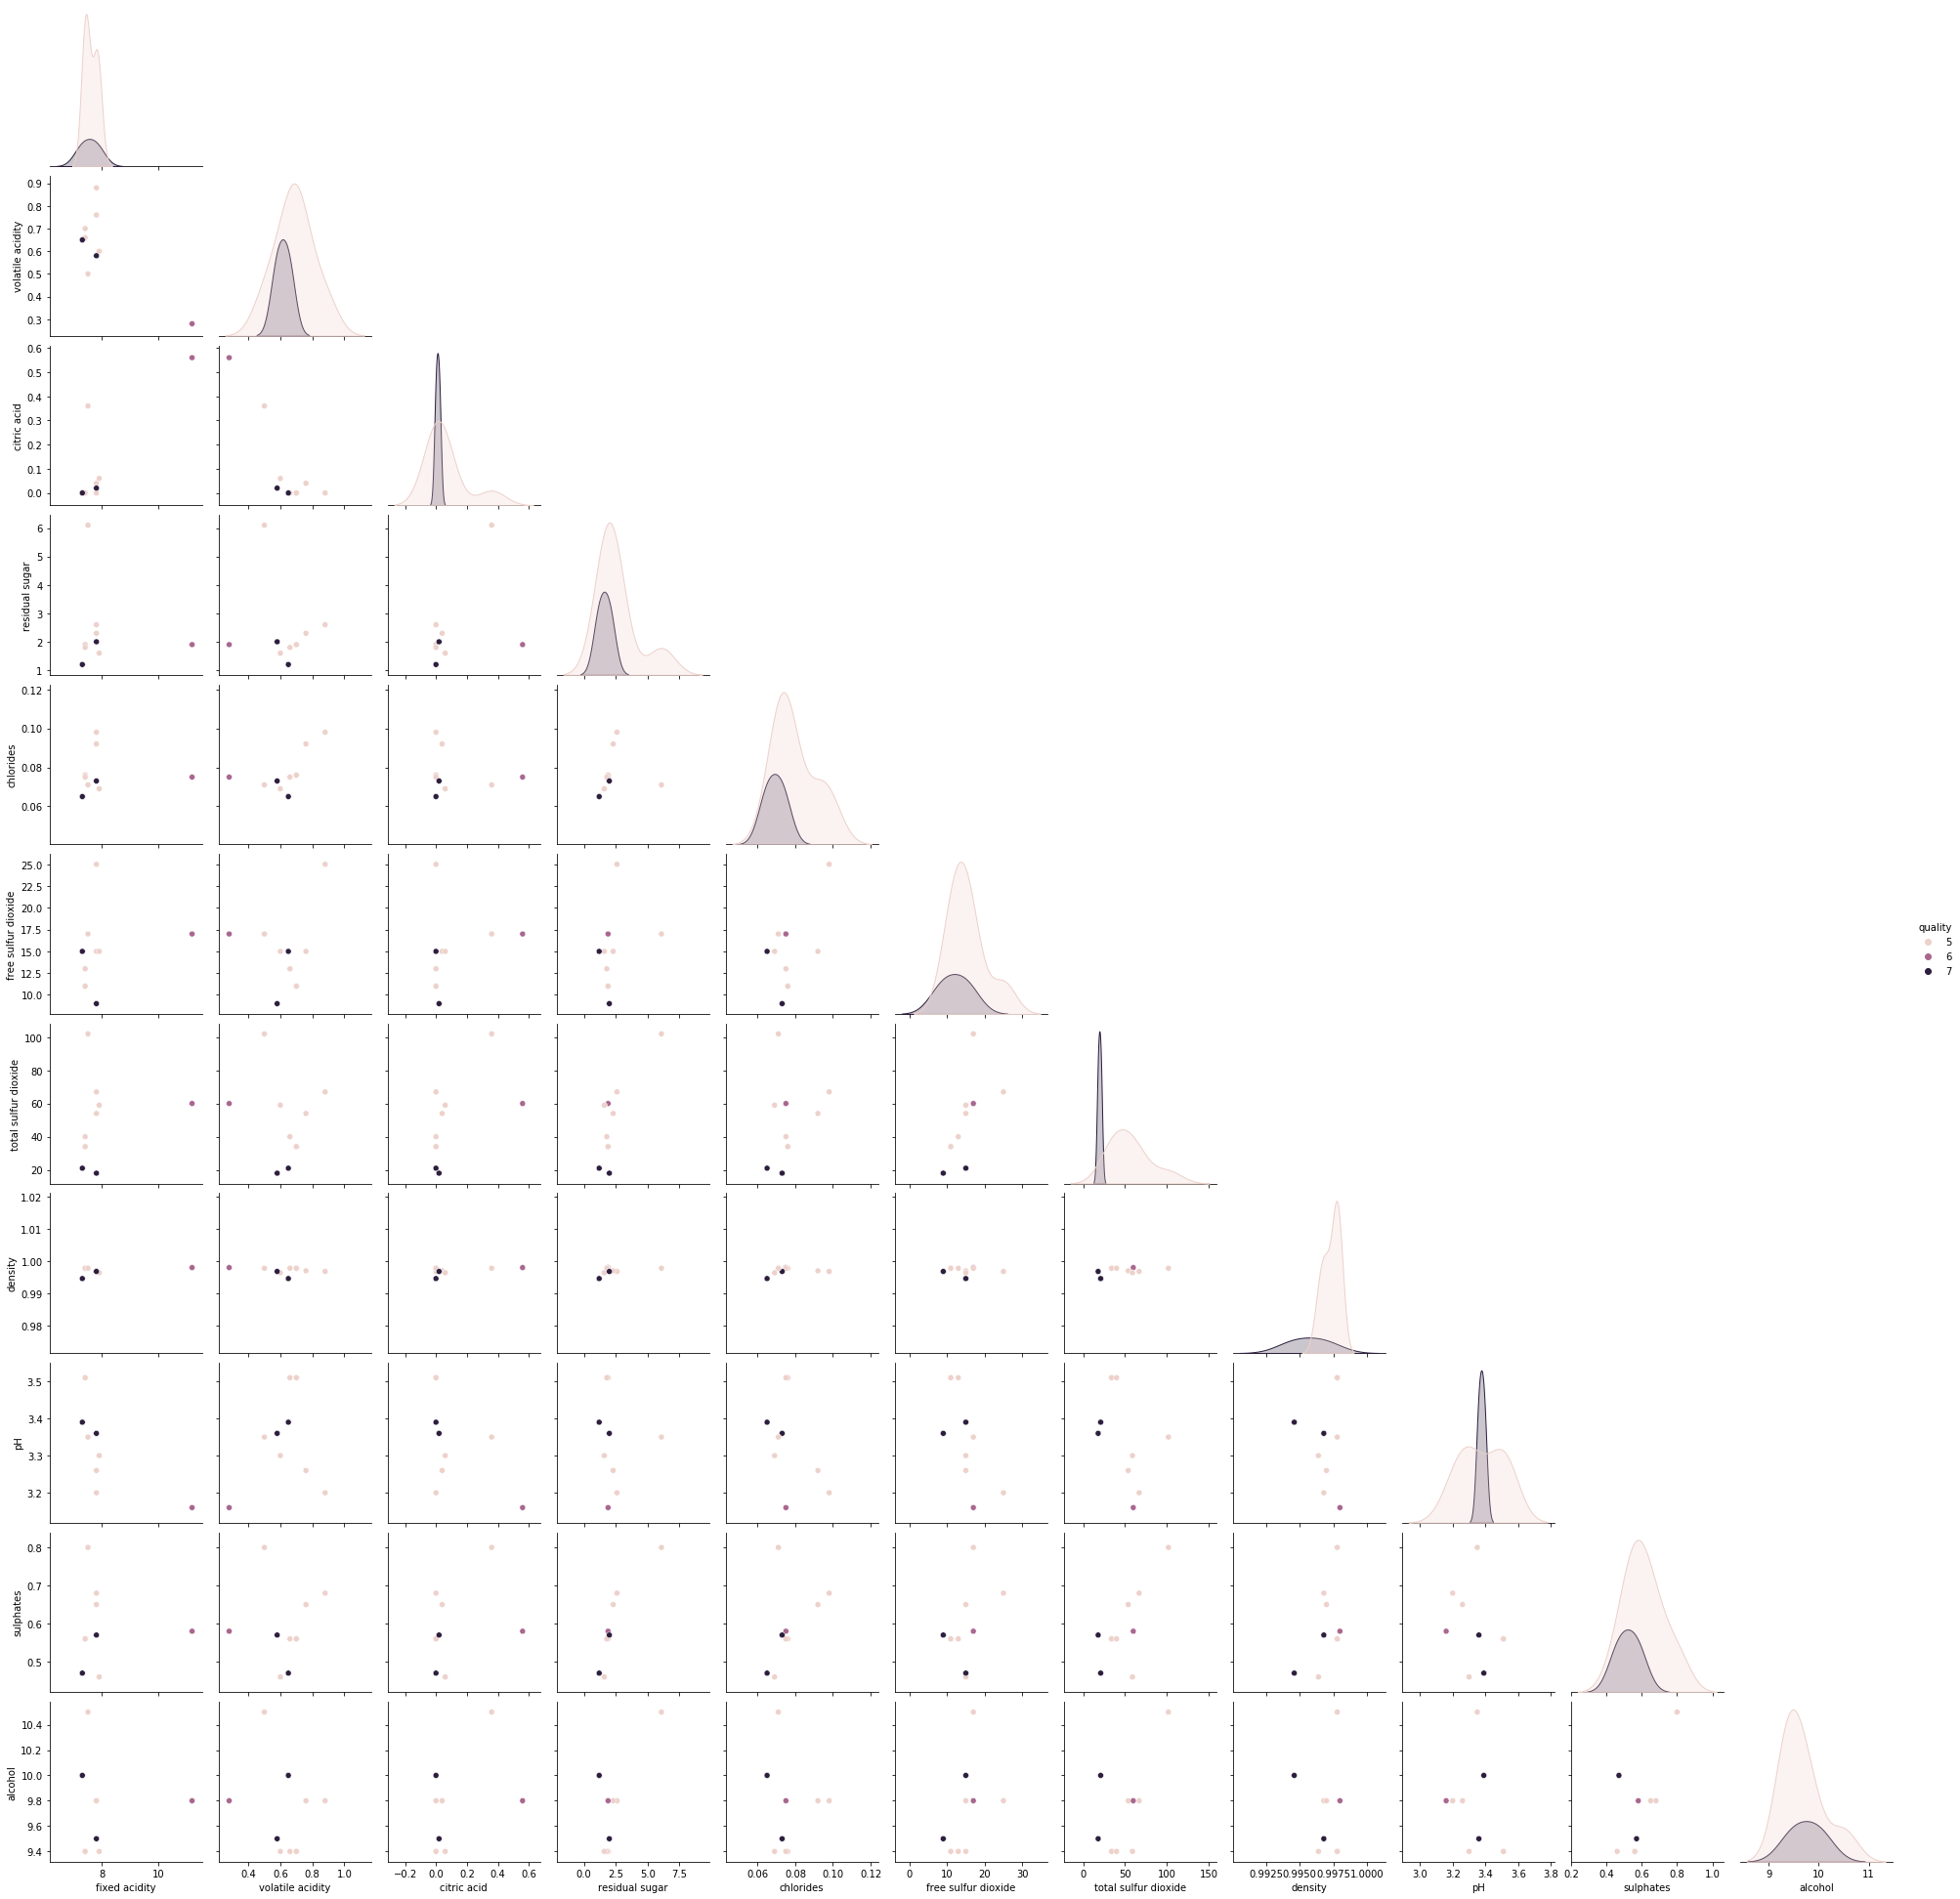

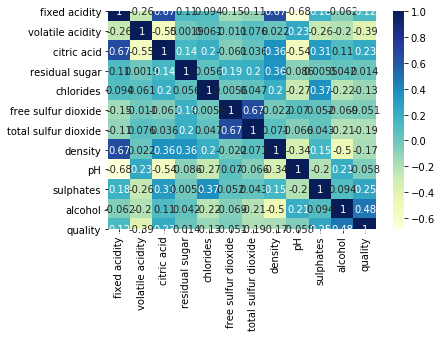

In [10]:
%matplotlib inline
df.hist(figsize = [15,10]); # [x, y]

import seaborn as sns
import matplotlib.pyplot as plt
plt.show(no_warn(sns.pairplot)(df[:10], hue='quality', corner=True));

sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

**Boxplots (detect outliers...):**

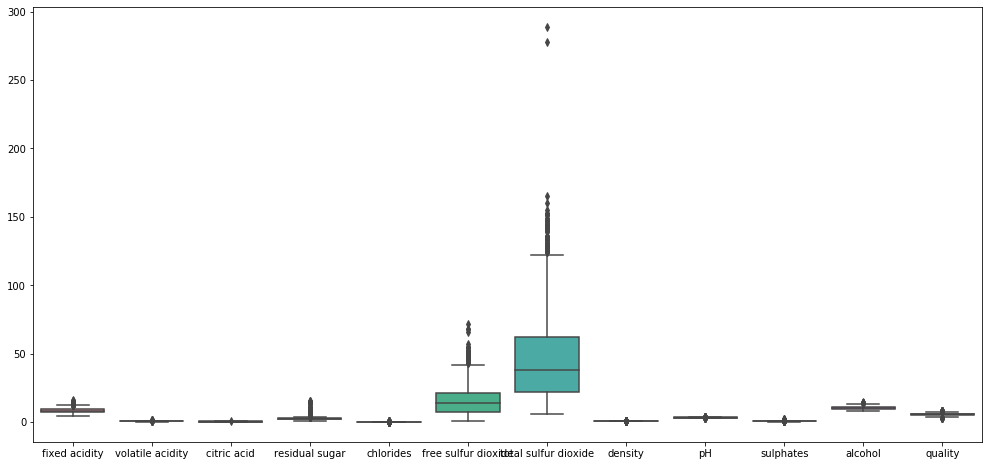

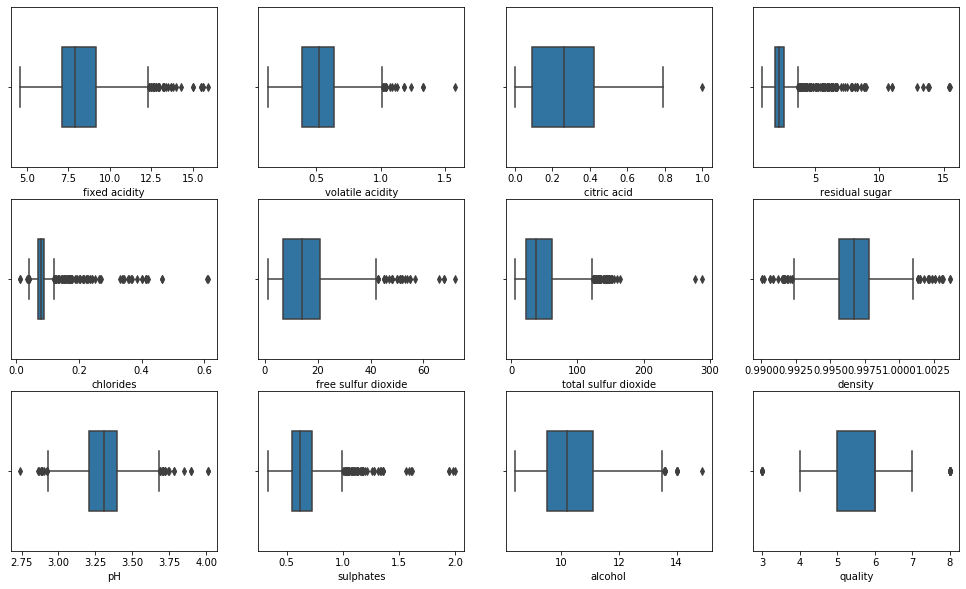

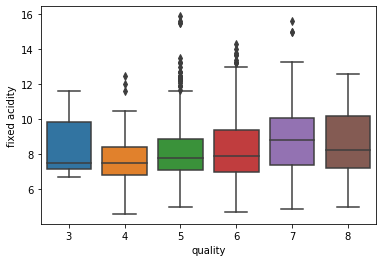

In [16]:
plt.figure(figsize=(17,8))
sns.boxplot(data = df);

# Better, esp. with non-normalized data:
def boxplots(df):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(17,10))
    pos = 1
    for i in df.columns:
        plt.subplot(3, 4, pos)
        sns.boxplot(x = df[i], width=.5)
        pos += 1
    plt.show()

boxplots(df)

# To compare only two (categ.) atttributes:
sns.boxplot(x='quality', y='fixed acidity', data = df);

## Split data for supervised learning

In [19]:
class_ = 'quality'
RANDOM_STATE = 44

y = df[class_]
X = df.drop(columns=class_)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = Tup = train_test_split(
    X, y,
    random_state=RANDOM_STATE,
    train_size = 0.66             # 0.75 default
)

n_features = X_train.shape[1]     
assert(n_features==X_test.shape[1])

for _ in Tup: print(end=f'{_.shape} ')

(1055, 11) (544, 11) (1055,) (544,) 

## Classification with decision tree (trivial example)

In [21]:
from sklearn import tree

DTCLASSIF_PARS = {'criterion':'entropy'}

def instantiate_and_predict(X_data, y_target, X_to_predict, **pars):
    global RANDOM_STATE, DTCLASSIF_PARS
    estim = tree.DecisionTreeClassifier(**pars, **DTCLASSIF_PARS, random_state=RANDOM_STATE)
    estim.fit(X_data, y_target)
    return (estim, estim.predict(X_to_predict))

model, tr_predicted = instantiate_and_predict(X_train, y_train, X_train)
test_predicted = model.predict(X_test)

## Compute accuracy and other metrics

In [23]:
from sklearn.metrics import accuracy_score

def print_accuracy(s1_name, s2):
    accur = accuracy_score(eval(s1_name), s2)*100
    print(f'The accuracy on {s1_name} is {accur:.4}%')
    return accur
    
print_accuracy('y_train', tr_predicted)
print_accuracy('y_test', test_predicted);

#import sklearn.metrics as skm
#sorted([ _ for _ in skm.__all__ if 'score' in _])

The accuracy on y_train is 100.0%
The accuracy on y_test is 57.72%


## Plot a decision tree

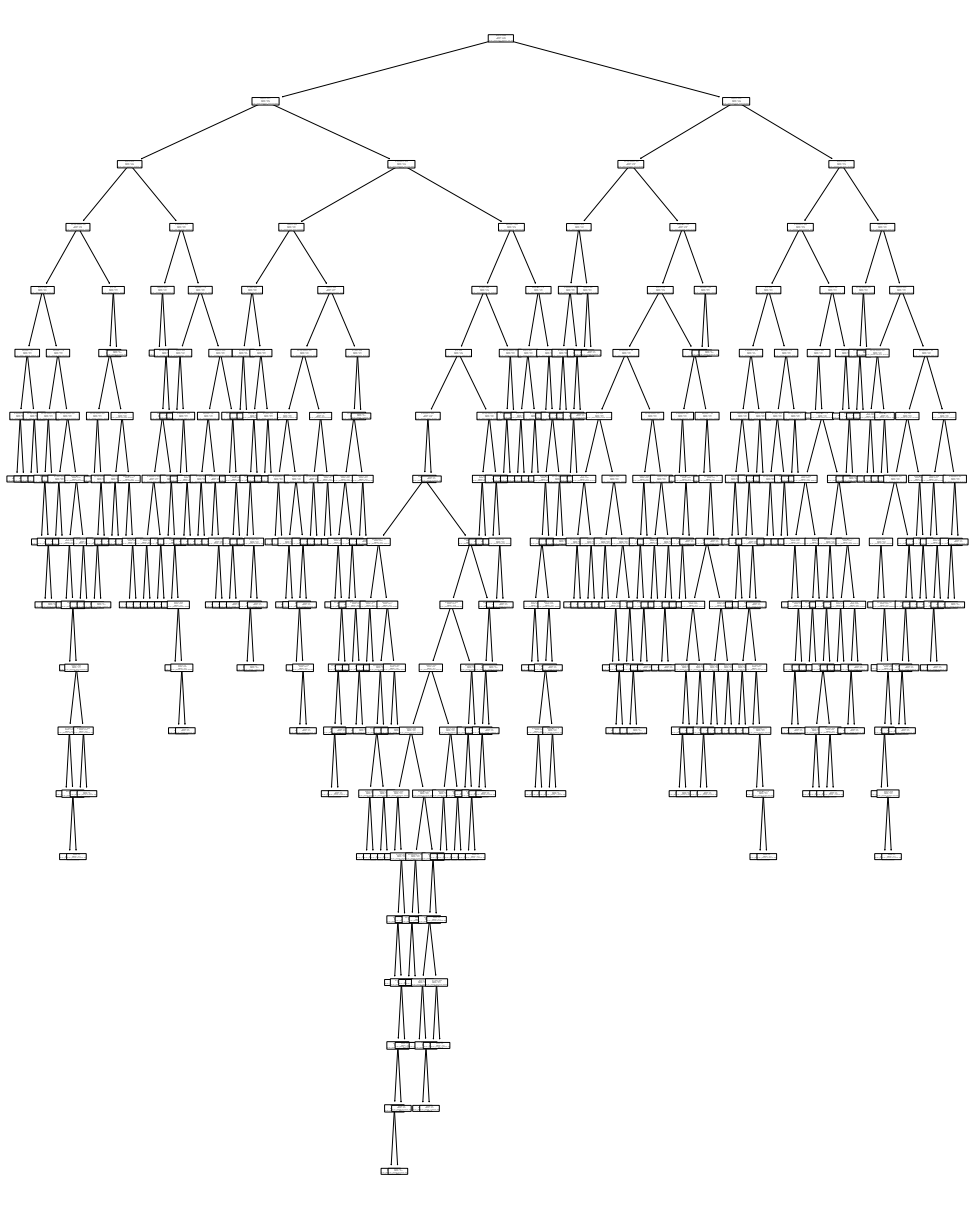

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,22))
plot_tree(
    model,
    feature_names=df.columns,
    class_names=class_,
    rounded = True,
    proportion = True
);

## Compute Centroids (having the labels)
See _Plot Points_ section for examples about these functions. \
See _Elbow Method_ section to know how to compute labels and centroids directly (using KMeans).

**The fastest way:**

In [25]:
def centroids2(arr, labels, **args):
    from sklearn.neighbors import NearestCentroid
    return NearestCentroid(**args).fit(arr, labels).centroids_

**Without using sklearn:**

In [26]:
def centroids(arr, labels, FUN=np.mean):
    centroids = []
    ulabels = np.unique(labels)
    for L in ulabels:
        tr = arr[[_==L for _ in labels],:].transpose()
        centroids.append([FUN(tr[_]) for _ in range(arr.shape[1])])
    return np.array(centroids)

## Plot points

**Just points:**

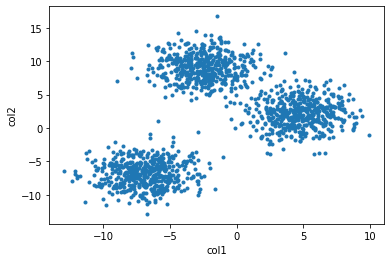

In [27]:
arr = np.array(df2.iloc[:,0:2])

plt.xlabel(df2.iloc[:,0].name)
plt.ylabel(df2.iloc[:,1].name)

plt.plot(arr[:,0], arr[:,1], '.');

**Clusters (different colors and centroids):** \
( Code by **Claudio Sartori** slightly adapted for compatibility. Originally in plot_clusters.py )

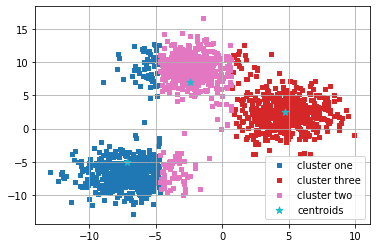

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster ', 
                  points_name = 'centroids',
                  colors = cm.tab10, # a qualitative map
                  points_color = cm.tab10(10) # by default the last of the map (to be improved)
                 ):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[[_==labels[i] for _ in y],dim[0]], 
                    X[[_==labels[i] for _ in y],dim[1]], 
                    s=10, c = [color], marker='s', label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]], points[:,dim[1]], s=50, marker='*', c=[points_color], label=points_name)
    plt.legend()
    plt.grid()
    plt.show()
    

some_rand_labels = ['one' if arr[_][0]<-4.7 else 'two' if arr[_][0]<.7 else 'three' for _ in range(len(arr))]

plot_clusters(
    arr,
    some_rand_labels,
    (0,1),
    centroids2(arr, some_rand_labels)                  # try to add eg: metric='manhattan'
    # ALTERNATIVE: centroids(arr, some_rand_labels)    # try to add eg: FUN=np.median
);

## Elbow Method (includes KMeans)

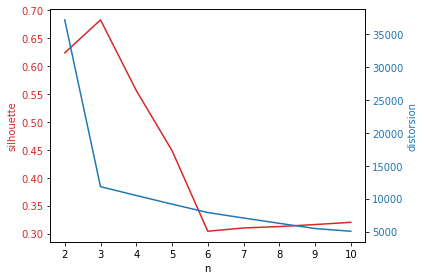

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cicling over different KMeans estimators, one for each value of K in [2,10]:
distorsions = []
silhouette_scores = []
for n in range(2, 11):
    est = KMeans(n_clusters=n, random_state = RANDOM_STATE)
    predicted = est.fit_predict(df2)
    distorsions.append(est.inertia_)
    silhouette_scores.append(silhouette_score(df2, predicted))


# (loosely based on some lines by Claudio Sartori)
def two_scale_plot(x_data, x_label, *y_tups, colors=('tab:red', 'tab:blue')):
    # https://matplotlib.org/3.1.0/gallery/color/named_colors.html
    fig, ax1 = plt.subplots()
    ax = (ax1, ax1.twinx())
    ax1.set_xlabel(x_label)
    for i, (y_data, y_label) in enumerate(y_tups):
        ax[i].set_ylabel(y_label, color=colors[i])
        ax[i].plot(x_data, y_data, color=colors[i])
        ax[i].tick_params(axis='y', labelcolor=colors[i])
    fig.tight_layout()
    plt.show()
    
K_range = range(2,11)
two_scale_plot(K_range, 'n', (silhouette_scores, 'silhouette'), (distorsions, 'distorsion'))

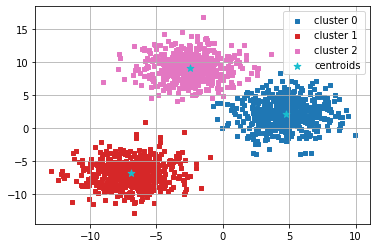

Distortion: 11831.85


In [32]:
# --- ALWAYS check this manually looking at the plot! ---
optimal_n_clusters = max(zip(K_range, silhouette_scores), key=lambda _:_[1])[0]

# We can now build the classifier with the optimal parameter:
est = KMeans(n_clusters=optimal_n_clusters, random_state=RANDOM_STATE)
predicted = est.fit_predict(df2)
plot_clusters(np.array(df2), predicted, (0,1), est.cluster_centers_)
print(f'Distortion: {est.inertia_:2.2f}')

## Silhouette plots
( Code by **Claudio Sartori**, slightly adapted and enhanced. Originally in plot_silhouette.py )

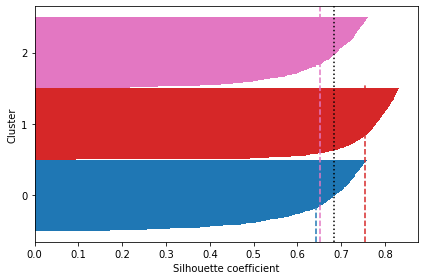

In [33]:
from matplotlib import cm

def plot_silhouette(silhouette_vals, y, colors = cm.tab10):
    """
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    
    """
    cluster_labels = np.unique(y)
    n_clusters = len(cluster_labels)
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels): # generate pairs index, cluster_label
        c_silhouette_vals = silhouette_vals[[_==c for _ in y]] # extracts records with the current cluster label
        c_silhouette_vals.sort() # sort the silhouette vals for the current class
        y_ax_upper += len(c_silhouette_vals)
        color = colors(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

        c_silhouette_avg = np.mean(c_silhouette_vals)
        plt.axvline(c_silhouette_avg, color=color, linestyle="--", ymax=(y_ax_upper-1)/len(silhouette_vals))

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='black', linestyle=":")
    plt.yticks(yticks, cluster_labels)# + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    # plt.savefig('./figures/silhouette.png', dpi=300)
    plt.show()


from sklearn.metrics import silhouette_samples
plot_silhouette(silhouette_samples(df2, predicted, metric='euclidean'), predicted)


## Preprocessing stuff

In [34]:
# Just loading data:
names = ['Class','age','menopause','tumor-size','inv-nodes',
         'node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv('breast-cancer.data', names = names, sep=',')

**Cleaning values, example of the missing zeros:**

In [36]:
# Use eg: "print(df['tumor-size'].unique())" to check.

from re import sub
def pretty(_): return sub(r'^(\d)-', r'0\1-', sub(r'-(\d)$', r'-0\1', _))

df['tumor-size'] = df['tumor-size'].map(pretty)
df['inv-nodes'] = df['inv-nodes'].map(pretty)

**Values transformation (encoding)**

In [37]:
# SEPARATE DIFFERENT KIND OF ATTRIBUTES:
non_numeric = list(df.dtypes[df.dtypes!=np.int64].keys())
numeric = ['deg-malig']
ordinal = ['age', 'tumor-size', 'inv-nodes']
categorical = ['irradiat', 'breast-quad', 'menopause', 'node-caps', 'breast']


from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# PREPARE THE TRANSFORMERS AND THE "COMPOSITE" TRANSFORMER:
transf_dtype = np.int32
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse = False,
    dtype = transf_dtype)
ordinal_transformer = OrdinalEncoder(dtype = transf_dtype)
trans_list = [('cat', categorical_transformer, categorical), ('ord', ordinal_transformer, ordinal)]
preprocessor = ColumnTransformer(
    transformers = trans_list,
    remainder = 'passthrough'
)

# Separate target:
y = df['Class']
X = df.drop(columns='Class')
class_labels = y.unique()

# That's only needed for some scoring functions eg. accuracy
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_enc = lenc.fit_transform(y)

# WE CAN NOW FIT-TRANSFORM THE PREPROCESSOR:
# preprocessor.fit(X)
X_p = preprocessor.fit_transform(X, y_enc)

**Nicely visualize the transformed data:**

In [38]:
# Right now this f. handles correctly only transformers that do not change
# the number of columns with the exception of OneHotEncoder.
def preprocessed_mat_to_df(preproc, mat, orig_df):
    estim_cols = set()
    labels = []
    remainder_is_pt = False
    for enc_name,enc,cols in preproc.transformers_:
        if enc_name=='remainder' and enc in ['passthrough', 'drop']:
            if enc=='passthrough': remainder_is_pt = True
            continue
        estim_cols |= set(cols)
        for col in cols:
            if isinstance(enc, OneHotEncoder):
                labels += [f'{col}_{n}' for n in range(1,len(orig_df[col].unique())+1)]
            else: labels += [f'{col}']
    if remainder_is_pt: labels += list(set(orig_df.columns)-estim_cols)
    return pd.DataFrame(X_p, columns=labels)

X_p_df = preprocessed_mat_to_df(preprocessor, X_p, X)
X_p_df

,irradiat_1,irradiat_2,breast-quad_1,breast-quad_2,breast-quad_3,breast-quad_4,breast-quad_5,breast-quad_6,menopause_1,menopause_2,menopause_3,node-caps_1,node-caps_2,node-caps_3,breast_1,breast_2,age,tumor-size,inv-nodes,deg-malig
0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,6,0,3
1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,2,4,0,2
2,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,2,4,0,2
3,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,4,3,0,2
4,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,6,0,2
282,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,4,0,3
283,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,4,4,0,1
284,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,2,6,1,3
